In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5,1,'ERROR: 5.829575720117956')

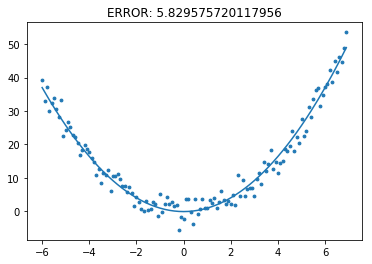

In [2]:
X_simple = np.arange(-6, 7, 0.1).reshape(-1, 1)
y_simple = [x**2 + np.random.normal(0,2.5) for x in X_simple]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
m = LinearRegression()
m.fit(X_simple**2, y_simple)
ypred = m.predict(X_simple**2)

plt.figure()
plt.scatter(X_simple, y_simple, s=8) #here I'm plotting the data
plt.plot(X_simple, ypred) #here I'm plotting the regression line 
error = mean_squared_error(y_simple, ypred)
plt.title(f'ERROR: {error}')

In [3]:
import pandas as pd
df = pd.read_csv('../bike-sharing-demand/train.csv')

df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

Text(0.5,1,'SCORE: 0.44699454910542785')

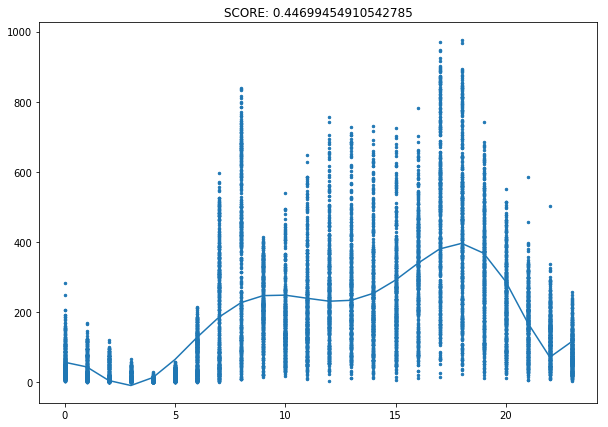

In [4]:
from sklearn.preprocessing import PolynomialFeatures

data = df.sort_values(by='hour')

poly = PolynomialFeatures(degree=7)
hour_poly = poly.fit_transform(data[['hour']])

m = LinearRegression()
m.fit(hour_poly, data['count'])

ypred = m.predict(hour_poly)

plt.figure(figsize=(10,7))
plt.scatter(data['hour'], data['count'], s=6)
plt.plot(data['hour'], ypred)
plt.title(f'SCORE: {m.score(hour_poly, data["count"])}')

In [5]:
poly.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7']

In [6]:
m.coef_

array([ 0.00000000e+00,  2.97888668e+01, -6.41067839e+01,  2.43496071e+01,
       -3.60902830e+00,  2.56352952e-01, -8.73698142e-03,  1.14657948e-04])

Final prediction = 0*hour^0 + 29.7*hour^1 + (-6.41)*hour^2 + 24.3*hour^3 + ..... + 0.00014*hour^7

In [7]:
X = df.drop(['season', 'atemp', 'windspeed', 'casual', 'registered', 'count', 'datetime', 'holiday'], axis=1)

In [8]:
y = df['count']

In [9]:
from sklearn.metrics import mean_squared_log_error

m = LinearRegression()
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

print(X.columns)
print(poly.get_feature_names())
print(len(poly.get_feature_names()))

m.fit(X_poly, np.log(y))
ypred_log = m.predict(X_poly)

print(f'RMSLE SCORE: {np.sqrt(mean_squared_log_error(y, np.exp(ypred_log)))}')

Index(['workingday', 'weather', 'temp', 'humidity', 'month', 'year', 'day',
       'hour'],
      dtype='object')
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x5^2', 'x5 x6', 'x5 x7', 'x6^2', 'x6 x7', 'x7^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4', 'x0^2 x5', 'x0^2 x6', 'x0^2 x7', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x1 x4', 'x0 x1 x5', 'x0 x1 x6', 'x0 x1 x7', 'x0 x2^2', 'x0 x2 x3', 'x0 x2 x4', 'x0 x2 x5', 'x0 x2 x6', 'x0 x2 x7', 'x0 x3^2', 'x0 x3 x4', 'x0 x3 x5', 'x0 x3 x6', 'x0 x3 x7', 'x0 x4^2', 'x0 x4 x5', 'x0 x4 x6', 'x0 x4 x7', 'x0 x5^2', 'x0 x5 x6', 'x0 x5 x7', 'x0 x6^2', 'x0 x6 x7', 'x0 x7^2', 'x1^3', 'x1^2 x2', 'x1^2 x3', 'x1^2 x4', 'x1^2 x5', 'x1^2 x6', 'x1^2 x7', 'x1 x2^2', 'x1 x2 x3', 'x1 x

---

## Regularization

Text(0.5,1,'DEGREE: 12, MSE: 0.28')

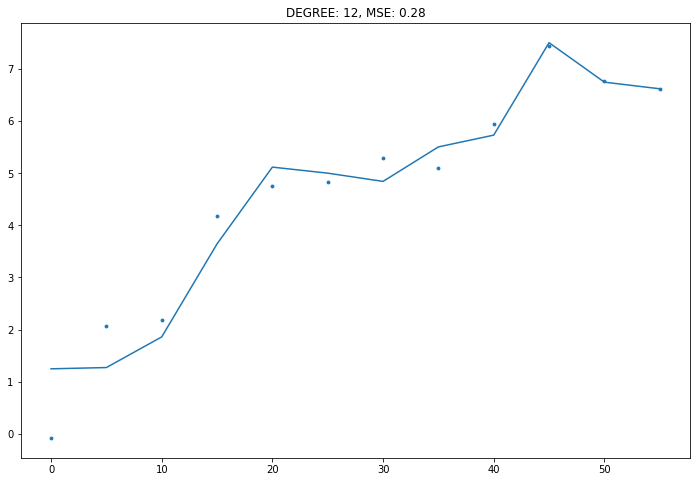

In [10]:
import math
X_simple = np.arange(0, 60, 5).reshape(-1,1)
y_simple = [math.sqrt(x) + np.random.normal(0, 0.6) for x in X_simple]

DEGREE = 12
poly = PolynomialFeatures(degree=DEGREE)
X_poly = poly.fit_transform(X_simple)


m = LinearRegression()
m.fit(X_poly, y_simple)
ypred = m.predict(X_poly)

plt.figure(figsize=(12, 8))
plt.scatter(X_simple, y_simple, s=8)
plt.plot(X_simple, ypred)
plt.title(f'DEGREE: {DEGREE}, MSE: {round(mean_squared_error(ypred, y_simple), 2)}')

Text(0.5,1,'DEGREE: 4, MSE: 0.51')

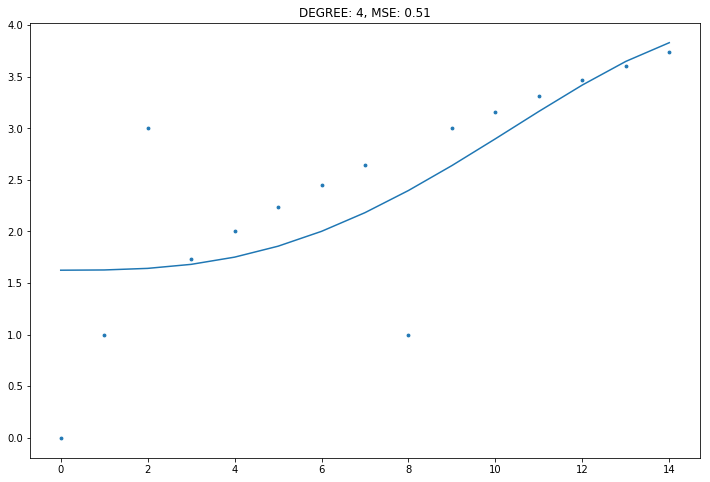

In [11]:
X_simple = np.arange(0, 15, 1).reshape(-1,1) #Create your X data
y_simple = [math.sqrt(x) for x in X_simple] #Create your y data

from sklearn.linear_model import Ridge #import Ridge
from sklearn.linear_model import Lasso #import Lasso


#CREATE SOME OUTLIERS 
y_simple[2] = 3
y_simple[8] = 1


DEGREE = 4 #Defining the degree of the PolynomialFeatures
poly = PolynomialFeatures(degree=DEGREE) #increases complexity because the degree is 4
X_poly = poly.fit_transform(X_simple) #put the fit transformed X into a variable


# m = LinearRegression() #m equals LinearRegression
# m = Ridge(alpha=6.0) #decreases complexity #M equals Ridge, one of the ways of regularizing
m = Lasso(alpha=6.0) #works quasi as a model itself

m.fit(X_poly, y_simple) #you fit your X_poly into this lasso with simple y
ypred = m.predict(X_poly) #you predict out of this Lasso thing and so you regularize your prediction

plt.figure(figsize=(12, 8))
plt.scatter(X_simple, y_simple, s=8)
plt.plot(X_simple, ypred)
plt.title(f'DEGREE: {DEGREE}, MSE: {round(mean_squared_error(ypred, y_simple), 2)}')

In [12]:
m.coef_

array([ 0.        ,  0.        ,  0.        ,  0.00244978, -0.00011757])

---

### Good Use Case for Lasso

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# m = LinearRegression()
m = Lasso(alpha=2.0)
DEGREE = 6
poly = PolynomialFeatures(degree=DEGREE)
X_train_poly = poly.fit_transform(X_train)

m.fit(X_train_poly, np.log(y_train))
ypred_train_log = m.predict(X_train_poly)

#I now have to transform my X test data in the same way I transformed my X train data!

X_test_poly = poly.transform(X_test) ### DO NOT REFIT! JUST TRANSFORM!
ypred_test_log = m.predict(X_test_poly)

print(f'With DEGREE of {DEGREE}, I get {len(poly.get_feature_names())} features!')
print(f'After Lasso regularization, only {len(m.coef_[m.coef_ != 0.00])} remain!')
print()
print(f'I get a training RMSLE of ... {np.sqrt(mean_squared_log_error(y_train, np.exp(ypred_train_log)))}')
print(f'I get a testing RMSLE of ... {np.sqrt(mean_squared_log_error(y_test, np.exp(ypred_test_log)))}')
print()
print('Here are the coefficients (slopes and intercepts of all my features...)\n')
print(m.coef_)

/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


With DEGREE of 6, I get 3003 features!
After Lasso regularization, only 2330 remain!

I get a training RMSLE of ... 0.6715862809735705
I get a testing RMSLE of ... 0.7098265545900414

Here are the coefficients (slopes and intercepts of all my features...)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.57977026e-08
  1.41886430e-09 -1.27247288e-08]


---

### Develop some kind of workflow / pipeline:

feature-engineering function --> Scaler -- > Polynomial Features --> Model

In [15]:
# def feature_engineering(df):
    
    
#     #do some cool stuff
#     #e.g. one-hot encoding, categorical encoding, datetime stuff
    
#     if poly is already fitted, then do:
#         poly.transform()
        
#     else: if it's not fitted yet:
#         poly.fit_transform()

### Pipelining in Sklearn

- allows us to put multiple "models" into one model
    - "models" include: Scalers, Polynomial Features, Classification Models, Unsupervised models, clustering algorithms.

In [16]:
from sklearn.pipeline import make_pipeline

In [18]:
DEGREES = [2, 3, 4, 5, 6]
ALPHAS = [0.1, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0]


for d in DEGREES:
    
    for a in ALPHAS:

        p = make_pipeline(PolynomialFeatures(degree=d), Lasso(alpha=a))
        
        print(f'Combination: {d}, {a}')

        # building a pipeline with 2 steps:
            #1. create polynomial features
            #2. then use the featured data as an input to a Lasso-LinearRegression model

        p.fit(X_train, np.log(y_train))

        ypred_log = p.predict(X_train)
        rmsle_train = mean_squared_log_error(y_train, np.exp(ypred_log))
        print(rmsle_train)

        ypred_test_log = p.predict(X_test)
        rmsle_test = mean_squared_log_error(y_test, np.exp(ypred_test_log))
        print(rmsle_test)

Combination: 2, 0.1
0.7339718759601321
0.76131482358008
Combination: 2, 0.5
0.7542030292353121
0.7801317939536933
Combination: 2, 0.75
0.7549422475891883
0.7810723883288287
Combination: 2, 1.0
0.7556146639996628
0.7820117095881841
Combination: 2, 1.5
0.7573489576950115
0.7845850415123213
Combination: 2, 2.0
0.7595552832245779
0.787835121163657
Combination: 2, 3.0
0.7652096094237945
0.7960790186993965
Combination: 3, 0.1


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.6034685607242195
0.6391729936902314
Combination: 3, 0.5


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.6130590728821295
0.6467788218691021
Combination: 3, 0.75


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.6172502775743715
0.6503925902629542
Combination: 3, 1.0


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.6191194618923677
0.6515863026684584
Combination: 3, 1.5


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.623323393990006
0.6557206924839522
Combination: 3, 2.0


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.6282547781559661
0.6601522469122372
Combination: 3, 3.0


KeyboardInterrupt: 

### OK, so now that I have a model (or maybe a pipeline of models), I want to play around with all possible hyperparameter combinations:
- **Which one is the best?**

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
#GRID --> it "searches" through a "grid" of all combinations of hyperparameters
#CV ---> Cross-Validator. For every one of these combinations, do an internal cross-val score.

In [21]:
# def rmsle(ytrue, ypred):
    
#     ypred[ypred < 0] = 0.0
#     rmsle = np.sqrt(mean_squared_log_error(ytrue, ypred))

#     return rmsle


In [25]:
param_grid = {'lasso__alpha': [0.75, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0],
              'polynomialfeatures__degree': [2, 3, 4]   
}


grid = GridSearchCV(p, param_grid=param_grid, verbose=2)

In [26]:
grid.fit(X_train, y_train)

/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 21 candidates, totalling 63 fits
[CV] lasso__alpha=0.75, polynomialfeatures__degree=2 .................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .. lasso__alpha=0.75, polynomialfeatures__degree=2, total=   0.3s
[CV] lasso__alpha=0.75, polynomialfeatures__degree=2 .................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .. lasso__alpha=0.75, polynomialfeatures__degree=2, total=   0.3s
[CV] lasso__alpha=0.75, polynomialfeatures__degree=2 .................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .. lasso__alpha=0.75, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=0.75, polynomialfeatures__degree=3 .................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .. lasso__alpha=0.75, polynomialfeatures__degree=3, total=   1.1s
[CV] lasso__alpha=0.75, polynomialfeatures__degree=3 .................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .. lasso__alpha=0.75, polynomialfeatures__degree=3, total=   1.1s
[CV] lasso__alpha=0.75, polynomialfeatures__degree=3 .................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .. lasso__alpha=0.75, polynomialfeatures__degree=3, total=   1.1s
[CV] lasso__alpha=0.75, polynomialfeatures__degree=4 .................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .. lasso__alpha=0.75, polynomialfeatures__degree=4, total=   3.4s
[CV] lasso__alpha=0.75, polynomialfeatures__degree=4 .................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .. lasso__alpha=0.75, polynomialfeatures__degree=4, total=   3.3s
[CV] lasso__alpha=0.75, polynomialfeatures__degree=4 .................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .. lasso__alpha=0.75, polynomialfeatures__degree=4, total=   3.2s
[CV] lasso__alpha=1.0, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.0, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=1.0, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.0, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=1.0, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.0, polynomialfeatures__degree=2, total=   0.3s
[CV] lasso__alpha=1.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.0, polynomialfeatures__degree=3, total=   1.2s
[CV] lasso__alpha=1.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.0, polynomialfeatures__degree=3, total=   1.1s
[CV] lasso__alpha=1.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.0, polynomialfeatures__degree=3, total=   1.1s
[CV] lasso__alpha=1.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.0, polynomialfeatures__degree=4, total=   3.4s
[CV] lasso__alpha=1.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.0, polynomialfeatures__degree=4, total=   3.3s
[CV] lasso__alpha=1.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.0, polynomialfeatures__degree=4, total=   3.3s
[CV] lasso__alpha=1.5, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.5, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=1.5, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.5, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=1.5, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.5, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=1.5, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.5, polynomialfeatures__degree=3, total=   1.3s
[CV] lasso__alpha=1.5, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.5, polynomialfeatures__degree=3, total=   1.2s
[CV] lasso__alpha=1.5, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.5, polynomialfeatures__degree=3, total=   1.1s
[CV] lasso__alpha=1.5, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.5, polynomialfeatures__degree=4, total=   3.3s
[CV] lasso__alpha=1.5, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.5, polynomialfeatures__degree=4, total=   3.3s
[CV] lasso__alpha=1.5, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=1.5, polynomialfeatures__degree=4, total=   3.3s
[CV] lasso__alpha=2.0, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=2.0, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=2.0, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=2.0, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=2.0, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=2.0, polynomialfeatures__degree=2, total=   0.3s
[CV] lasso__alpha=2.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=2.0, polynomialfeatures__degree=3, total=   1.2s
[CV] lasso__alpha=2.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=2.0, polynomialfeatures__degree=3, total=   1.2s
[CV] lasso__alpha=2.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=2.0, polynomialfeatures__degree=3, total=   1.1s
[CV] lasso__alpha=2.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=2.0, polynomialfeatures__degree=4, total=   3.2s
[CV] lasso__alpha=2.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=2.0, polynomialfeatures__degree=4, total=   3.1s
[CV] lasso__alpha=2.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=2.0, polynomialfeatures__degree=4, total=   3.1s
[CV] lasso__alpha=3.0, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=3.0, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=3.0, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=3.0, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=3.0, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=3.0, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=3.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=3.0, polynomialfeatures__degree=3, total=   1.0s
[CV] lasso__alpha=3.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=3.0, polynomialfeatures__degree=3, total=   1.0s
[CV] lasso__alpha=3.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=3.0, polynomialfeatures__degree=3, total=   1.0s
[CV] lasso__alpha=3.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=3.0, polynomialfeatures__degree=4, total=   3.2s
[CV] lasso__alpha=3.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=3.0, polynomialfeatures__degree=4, total=   3.2s
[CV] lasso__alpha=3.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=3.0, polynomialfeatures__degree=4, total=   3.2s
[CV] lasso__alpha=4.0, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=4.0, polynomialfeatures__degree=2, total=   0.3s
[CV] lasso__alpha=4.0, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=4.0, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=4.0, polynomialfeatures__degree=2 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=4.0, polynomialfeatures__degree=2, total=   0.3s
[CV] lasso__alpha=4.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=4.0, polynomialfeatures__degree=3, total=   1.1s
[CV] lasso__alpha=4.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=4.0, polynomialfeatures__degree=3, total=   1.1s
[CV] lasso__alpha=4.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=4.0, polynomialfeatures__degree=3, total=   1.0s
[CV] lasso__alpha=4.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=4.0, polynomialfeatures__degree=4, total=   3.3s
[CV] lasso__alpha=4.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=4.0, polynomialfeatures__degree=4, total=   3.2s
[CV] lasso__alpha=4.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=4.0, polynomialfeatures__degree=4, total=   3.2s
[CV] lasso__alpha=5.0, polynomialfeatures__degree=2 ..................
[CV] ... lasso__alpha=5.0, polynomialfeatures__degree=2, total=   0.3s
[CV] lasso__alpha=5.0, polynomialfeatures__degree=2 ..................
[CV] ... lasso__alpha=5.0, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=5.0, polynomialfeatures__degree=2 ..................
[CV] ... lasso__alpha=5.0, polynomialfeatures__degree=2, total=   0.2s
[CV] lasso__alpha=5.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=5.0, polynomialfeatures__degree=3, total=   1.0s
[CV] lasso__alpha=5.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=5.0, polynomialfeatures__degree=3, total=   1.0s
[CV] lasso__alpha=5.0, polynomialfeatures__degree=3 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=5.0, polynomialfeatures__degree=3, total=   1.0s
[CV] lasso__alpha=5.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=5.0, polynomialfeatures__degree=4, total=   3.2s
[CV] lasso__alpha=5.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... lasso__alpha=5.0, polynomialfeatures__degree=4, total=   3.6s
[CV] lasso__alpha=5.0, polynomialfeatures__degree=4 ..................


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:  1.6min finished


[CV] ... lasso__alpha=5.0, polynomialfeatures__degree=4, total=   3.3s


/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lasso__alpha': [0.75, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0], 'polynomialfeatures__degree': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [28]:
grid.best_params_

{'lasso__alpha': 5.0, 'polynomialfeatures__degree': 4}

In [29]:
grid.best_score_

0.6284186032179191

In [31]:
final_model = grid.best_estimator_

In [3]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)

NameError: name 'grid' is not defined

In [1]:
results

NameError: name 'results' is not defined

In [39]:
# final_model.predict(kaggle)